In [ ]:
# !pip install yfinance
# !pip install evalml

In [ ]:
import evalml
from evalml.automl import AutoMLSearch

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
Featuretools may not support Python 3.7 in next non-bugfix release.


In [ ]:
import datetime as dt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf  
end = dt.today()
start = dt.today() - relativedelta(years=2)
data = yf.download('SBIN.NS', start, end)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-05,535.549988,542.900024,529.000000,531.049988,531.049988,21110734
2022-08-08,524.000000,524.000000,513.849976,520.400024,520.400024,32566317
2022-08-10,521.549988,523.500000,513.400024,514.700012,514.700012,16904151
2022-08-11,520.000000,526.000000,517.200012,524.750000,524.750000,13862195
2022-08-12,525.700012,531.799988,525.150024,530.700012,530.700012,12154012


In [ ]:
data.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-14,203.0,204.0,194.600006,196.5,191.710541,56169088


In [ ]:
data.size

2988

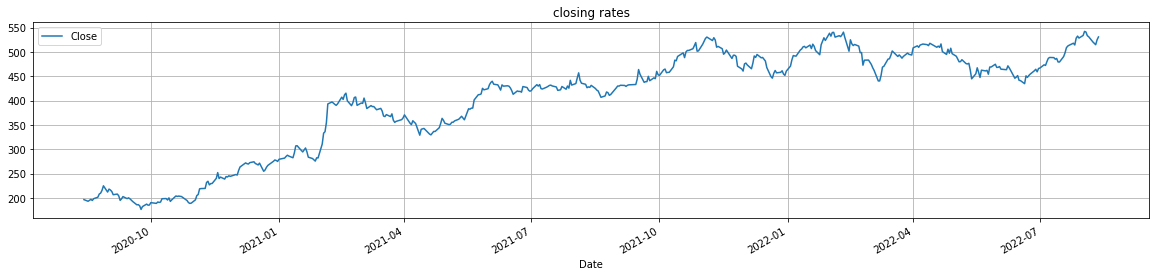

In [ ]:
import matplotlib.pyplot as plt
data.plot(y = 'Close',figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('closing rates')
plt.show(block=False)

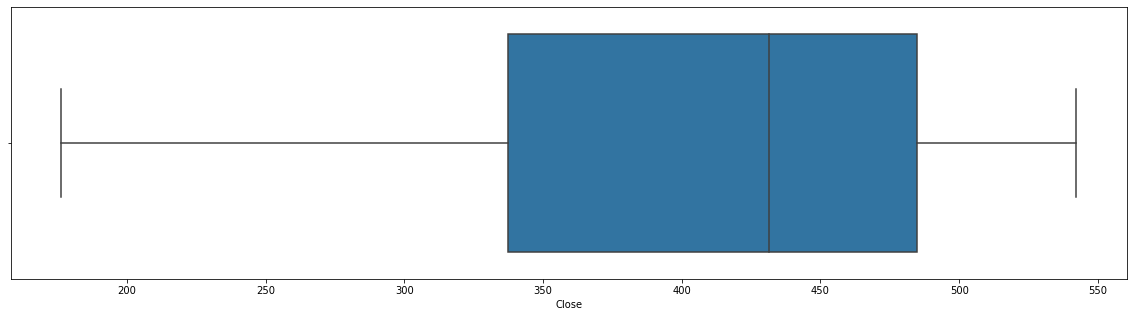

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data['Close'],whis=1.5)

In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
import pandas as pd
data.reset_index(inplace = True)
data = data.rename(columns={'Close': 'y'})
X = pd.DataFrame(data["Date"])
y = data['y']

In [ ]:
X

,Date
0,2020-08-14
1,2020-08-17
2,2020-08-18
3,2020-08-19
4,2020-08-20
...,...
493,2022-08-05
494,2022-08-08
495,2022-08-10
496,2022-08-11


In [ ]:
import numpy as np
y_train, y_test= np.split(y, [int(.8 *len(y))])
X_train, X_test= np.split(X, [int(.8 *len(X))])

In [ ]:
y.head()

0    196.500000
1    193.100006
2    195.100006
3    197.050003
4    194.750000
Name: y, dtype: float64

In [ ]:
import plotly.graph_objects as go

data = [
    go.Scatter(
        x=X_train["Date"],
        y=y_train,
        mode="lines+markers",
        name="closing price",
        line=dict(color="#1f77b4"),
    )
]
# Let plotly pick the best date format.
layout = go.Layout(
    title={"text": "share market closing price data SBI(10/08/2021 - 10/08/2022)"},
    xaxis={"title": "Time"},
    yaxis={"title": "closing price"},
)
 
go.Figure(data=data, layout=layout)

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [ ]:
problem_config = {"gap": 0, "max_delay": 7, "forecast_horizon": 15, "time_index": "Date"}
 
automl = AutoMLSearch(X_train, y_train, problem_type="time series regression",
                      max_batches=1,
                      max_iterations = 500,
                      problem_configuration=problem_config,
                      allowed_model_families=["xgboost", "random_forest", "linear_model", "extra_trees"]
                      )

/usr/local/lib/python3.7/dist-packages/evalml/automl/automl_search.py:475: UserWarning:

Time series support in evalml is still in beta, which means we are still actively building its core features. Please be mindful of that when running search().



In [ ]:
automl.search()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.572e+03, tolerance: 9.281e+00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.005e+04, tolerance: 1.058e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.496e+04, tolerance: 2.293e+02



In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,0,Time Series Baseline Regression Pipeline,0,23.566661,9.631257,23.566661,0.000000,False,{'Time Series Featurizer': {'time_index': 'Dat...
1,1,Elastic Net Regressor w/ Imputer + Time Series...,1,32.290708,18.939876,32.290708,-37.018598,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,4,Extra Trees Regressor w/ Imputer + Time Series...,4,63.086074,17.337742,63.086074,-167.692040,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,XGBoost Regressor w/ Imputer + Time Series Fea...,2,64.628276,27.848839,64.628276,-174.236035,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,3,Random Forest Regressor w/ Imputer + Time Seri...,3,73.232115,21.353361,73.232115,-210.744555,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [ ]:
baseline = automl.get_pipeline(0)
baseline.fit(X_train, y_train)
naive_baseline_preds = baseline.predict_in_sample(X_test, y_test, objective=None,
                                                  X_train=X_train, y_train=y_train)
expected_preds = pd.concat([y_train.iloc[-7:], y_test]).shift(7).iloc[7:]

In [ ]:
# pd.testing.assert_series_equal(expected_preds, naive_baseline_preds)

In [ ]:
pipeline = automl.best_pipeline
 
pipeline.fit(X_train, y_train)
 
temp_ordered_dict = pipeline.score(X_test, y_test, ['MedianAE'], X_train, y_train)
# print(type(temp))
best_pipeline_score = temp_ordered_dict['MedianAE']
print("the best pipeline's score is:", best_pipeline_score)

the best pipeline's score is: 26.300003051757812


In [ ]:
from evalml.model_understanding import graph_prediction_vs_actual_over_time
 
plot = graph_prediction_vs_actual_over_time(pipeline, X_test, y_test, X_train, y_train, dates=X_test['Date'])
plot

In [ ]:
Pred = pipeline.predict(X_test.iloc[:pipeline.forecast_horizon], objective=None, X_train=X_train, y_train=y_train)
Pred

398    482.950012
399    483.200012
400    474.250000
401    467.399994
402    461.950012
403    440.299988
404    440.299988
405    451.700012
406    468.700012
407    470.350006
408    485.149994
409    485.850006
410    492.750000
411    501.899994
412    490.600006
Name: y, dtype: float64

<AxesSubplot:>

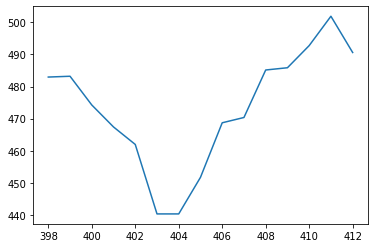

In [ ]:
Pred.plot()

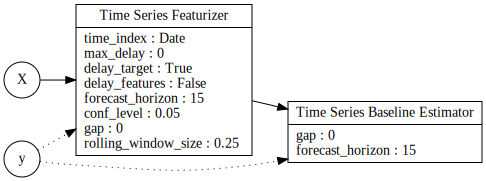

In [ ]:
pipeline = automl.best_pipeline
pipeline.graph()